<a href="https://colab.research.google.com/github/Praise-Atadja/Early-Intervention-Intelligence-for-Cognitive-Development/blob/main/NN_Early_Intervention_Intelligence_For_Cognitive_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **PRJECT NAME:**

##EARLY INTERVENTION INTELLIGENCE FOR COGNITIVE DEVELOPMENT (IICD)


---



(***This project is to predict the possibility of autism***)







# **CASE STUDY IMPLEMENTATION**

**Abstract**:
Autistic Spectrum Disorder (ASD) is a neurodevelopmental condition associated with significant healthcare costs, and early diagnosis can significantly reduce these. Unfortunately, waiting times for an ASD diagnosis are lengthy and procedures are not cost effective.

**Objective:**


1.   Implement two machine learning models:


*   Develop a simple neural network-based model on the selected dataset without employing any optimization techniques.

*   Develop a second model applying at least three optimization techniques.


2.   Discuss the results of optimizations and parameter settings for each model.


3.   Utilize separate training, validation, and test datasets for model evaluation.

2.   
Make predictions using the test data and evaluate the models' performance.










# **SECTION 1: The Dataset**
**Short Description of the Data:**

The dataset contains information pertinent to the screening of autism spectrum disorder (ASD), comprising the following columns:

1. ID: Unique identifier for each patient
2. A1_Score to A10_Score: Scores derived from the Autism Spectrum Quotient (AQ) 10 item screening tool
3. age: Age of the patient in years
4. gender: Gender of the patient
5. ethnicity: Ethnicity of the patient
6. jaundice: Indicator of whether the patient experienced jaundice at birth
7. autism: Indication of whether an immediate family member has been diagnosed with autism
8. country_of_res: Country where the patient resides
9. used_app_before: Flag indicating if the patient has previously undergone a screening test
10. result: Aggregate score for AQ1-10 screening test
11. age_desc: Description of the patient's age
12. relation: Relationship of the individual who completed the test with the patient
13. Class/ASD: Binary classification of ASD presence, where 0 signifies No ASD and 1 indicates ASD presence (target column)

The dataset is divided into a training set (train.csv) and a test set (test.csv).

The primary objective is to forecast the probability of an individual having ASD based on the provided features, with the "Class/ASD" column serving as the target variable for prediction.


Link to Dataset Source :

https://www.kaggle.com/competitions/autismdiagnosis/data


#  Analyzing the Data

In [1]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot, plot_model
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Dropout, Flatten, Dense
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
#load data
train_file = ('/content/drive/MyDrive/train.csv')
test_file = ('/content/drive/MyDrive/test.csv')

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

print("train -  rows:",train_data.shape[0]," columns:", train_data.shape[1])
print("test -  rows:",test_data.shape[0]," columns:", test_data.shape[1])
print(test_data.shape)

train -  rows: 800  columns: 22
test -  rows: 200  columns: 21
(200, 21)


In [5]:
# Inspect the structure
print(test_data.head())  # Display the first few rows
print(test_data.info())   # Get information about the dataset

   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         1         0         0         1         1         0   
1   2         1         0         0         0         0         0         0   
2   3         1         1         1         0         1         1         0   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         1         0         0         0   

   A8_Score  A9_Score  ...        age  gender       ethnicity jaundice austim  \
0         0         1  ...  15.599481       m  White-European      yes     no   
1         1         0  ...  27.181099       m           Asian       no     no   
2         1         1  ...  31.643906       m  White-European      yes     no   
3         0         0  ...  25.369210       m               ?       no     no   
4         0         0  ...   9.078580       m               ?       no     no   

  contry_of_res used_app_before     re

In [7]:
#Check for missing data
test_data.isna().sum()
train_data.isna().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

No missing values

In [25]:
# Remove missing columns
test_data_cleaned = test_data.dropna(axis=1)
train_data_cleaned = train_data.dropna(axis=1)


# Drop rows with missing values
test_data.dropna(inplace=True)
train_data.dropna(inplace=True)


No missing columns and rows

In [26]:
print(test_data.columns)



Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation'],
      dtype='object')


# Processing Data

In [27]:
# Drop irrelevant columns

x_train = train_data.drop(['used_app_before', 'age_desc', 'ID', 'contry_of_res', 'ethnicity', 'Class/ASD'], axis = 1)
test = test_data.drop(['used_app_before', 'age_desc', 'ID', 'contry_of_res', 'ethnicity'], axis = 1)
y_train = train_data['Class/ASD']
x_train.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,austim,result,relation
0,1,0,1,0,1,0,1,0,1,1,38.172746,f,no,no,6.351166,Self
1,0,0,0,0,0,0,0,0,0,0,47.750517,m,no,no,2.255185,Self
2,1,1,1,1,1,1,1,1,1,1,7.380373,m,no,yes,14.851484,Self
3,0,0,0,0,0,0,0,0,0,0,23.561927,f,no,no,2.276617,Self
4,0,0,0,0,0,0,0,0,0,0,43.205790,m,no,no,-4.777286,Self


In [28]:
# Replacing strings with their classes

x_train.replace({'no': 0, 'yes': 1}, inplace = True)
x_train.replace({'m': 0, 'f': 1}, inplace = True)
x_train.replace({'?': 'others', 'others': 'Others'}, inplace = True)
x_train.replace({'Self':0,'?':0,'Parent':0,'Relative':0,'Others':0, 'others':0,'Health care professional':1}, inplace = True)
test.replace({'no': 0, 'yes': 1}, inplace = True)
test.replace({'m': 0, 'f': 1}, inplace = True)
test.replace({'?': 'others', 'others': 'Others'}, inplace = True)
test.replace({'Self':0,'?':0,'Parent':0,'Relative':0,'Others':0, 'others':0,'Health care professional':1}, inplace = True)

In [29]:
# Normalising

cols=['age', 'result']
x_train[cols] = (x_train[cols] - x_train[cols].min())/ (x_train[cols].max()- x_train[cols].min())
test[cols] = (test[cols] - test[cols].min())/ (test[cols].max()- test[cols].min())
x_train.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,austim,result,relation
0,1,0,1,0,1,0,1,0,1,1,0.408726,1,0,0,0.567913,0
1,0,0,0,0,0,0,0,0,0,0,0.519141,0,0,0,0.381655,0
2,1,1,1,1,1,1,1,1,1,1,0.053743,0,0,1,0.954452,0
3,0,0,0,0,0,0,0,0,0,0,0.240288,1,0,0,0.382630,0
4,0,0,0,0,0,0,0,0,0,0,0.466748,0,0,0,0.061865,0


<ipython-input-20-b60f2bee343d>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



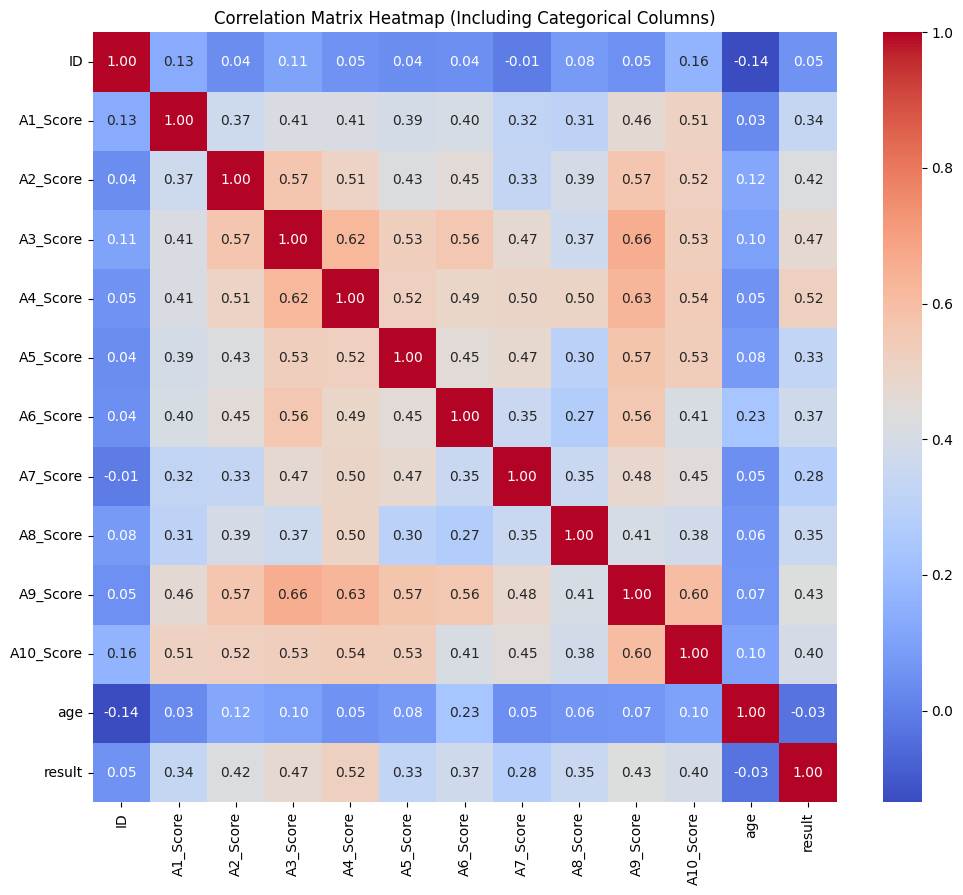

In [20]:
# Calculate the correlation matrix
correlation_matrix = test_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap (Including Categorical Columns)")
plt.show()


In [30]:
# Converting to NumPy

x_train = x_train.to_numpy()
test = test.to_numpy()
y_train = y_train.to_numpy()

In [31]:
# Split the data
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.30,  random_state=42)

In [33]:
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:",y_val.shape)

Shape of y_train: (560,)
Shape of y_val: (240,)


In [34]:
y_train = y_train.reshape(y_train.shape[0],1)
y_val = y_val.reshape(y_val.shape[0],1)

# **Section 2: Model Implementation**

#Model Without Optimization Techniques

Without Regularization

In [126]:
# Define the model architecture
model1=Sequential()
model1.add(Dense(x_train.shape[0],input_dim=x_train.shape[1],activation='relu')) # input layer
model1.add(Dense(128,activation='relu')) # hidden layers
model1.add(Dense(128,activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(1,activation='sigmoid')) # sigmoid output

# Compile the model without any optimizer
model1.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model1.summary()

# Train the model
history = model1.fit(x_train,y_train,epochs=50,validation_data=(x_val,y_val),verbose=1)

# Save the model
model1.save('/content/drive/MyDrive/saved_models/model1.pkl')


# Evaluate the model
_, train_accuracy = model1.evaluate(x_train, y_train)
test_loss, test_accuracy = model1.evaluate(x_val, y_val)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')



Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_319 (Dense)           (None, 560)               9520      
                                                                 
 dense_320 (Dense)           (None, 128)               71808     
                                                                 
 dense_321 (Dense)           (None, 128)               16512     
                                                                 
 dense_322 (Dense)           (None, 128)               16512     
                                                                 
 dense_323 (Dense)           (None, 128)               16512     
                                                                 
 dense_324 (Dense)           (None, 128)               16512     
                                                                 
 dense_325 (Dense)           (None, 1)               

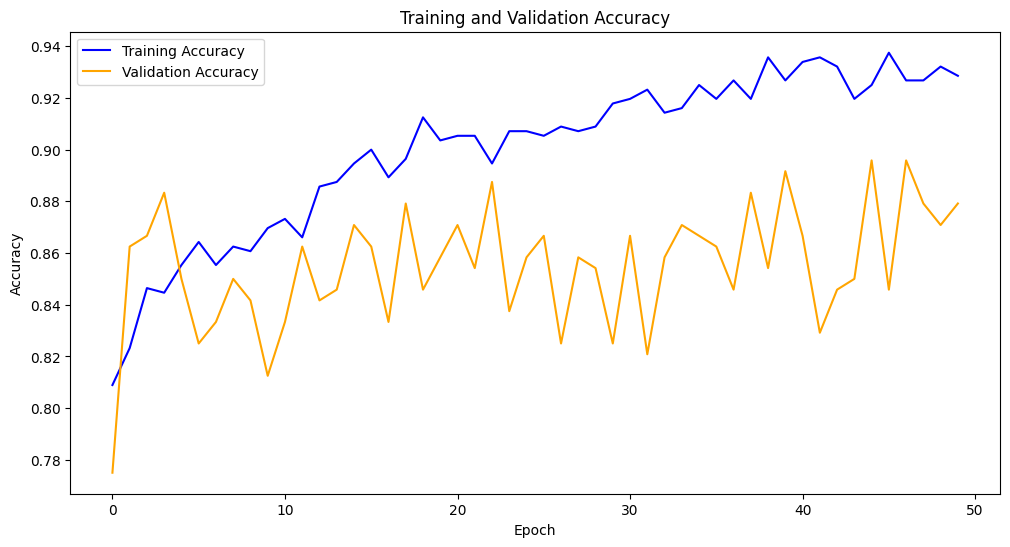

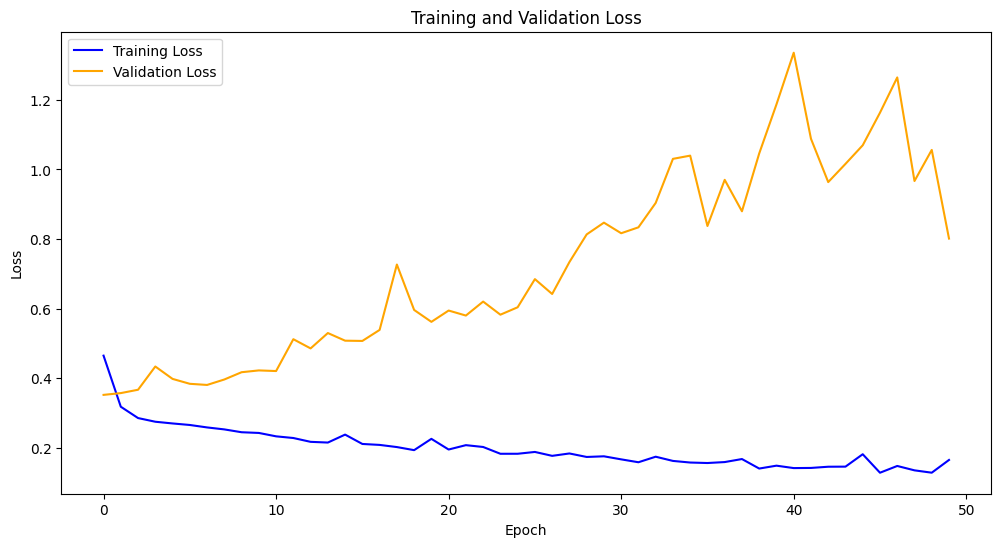

In [36]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


With Regularization

In [52]:
# Regularization1: L1 Regularization

model2 = Sequential()

# Input layer
model2.add(Dense(128, input_dim=x_train.shape[1], activation='relu', kernel_regularizer=l1(0.01)))

# Hidden layers
model2.add(Dense(128, activation='relu', kernel_regularizer=l1(0.01)))
model2.add(Dense(128, activation='relu', kernel_regularizer=l1(0.01)))
model2.add(Dense(128, activation='relu', kernel_regularizer=l1(0.01)))
model2.add(Dense(128, activation='relu', kernel_regularizer=l1(0.01)))

# Output layer
model2.add(Dense(1, activation='sigmoid'))


# Compile the model without an optimizer
model2.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model2.summary()

# Train the model
history_model2 = model2.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), verbose=1)

# Save the model

model2.save('/content/drive/MyDrive/saved_models/model2.pkl')

# Print the final accuracy
_, train_accuracy = model2.evaluate(x_train, y_train)
test_loss, test_accuracy = model2.evaluate(x_val, y_val)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 128)               2176      
                                                                 
 dense_97 (Dense)            (None, 128)               16512     
                                                                 
 dense_98 (Dense)            (None, 128)               16512     
                                                                 
 dense_99 (Dense)            (None, 128)               16512     
                                                                 
 dense_100 (Dense)           (None, 128)               16512     
                                                                 
 dense_101 (Dense)           (None, 1)                 129       
                                                                 
Total params: 68353 (267.00 KB)
Trainable params: 683

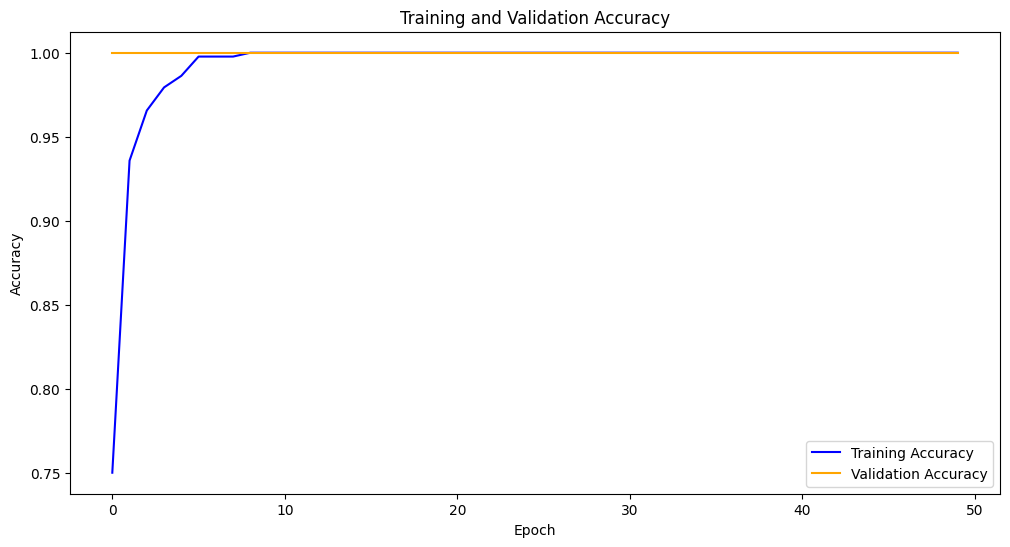

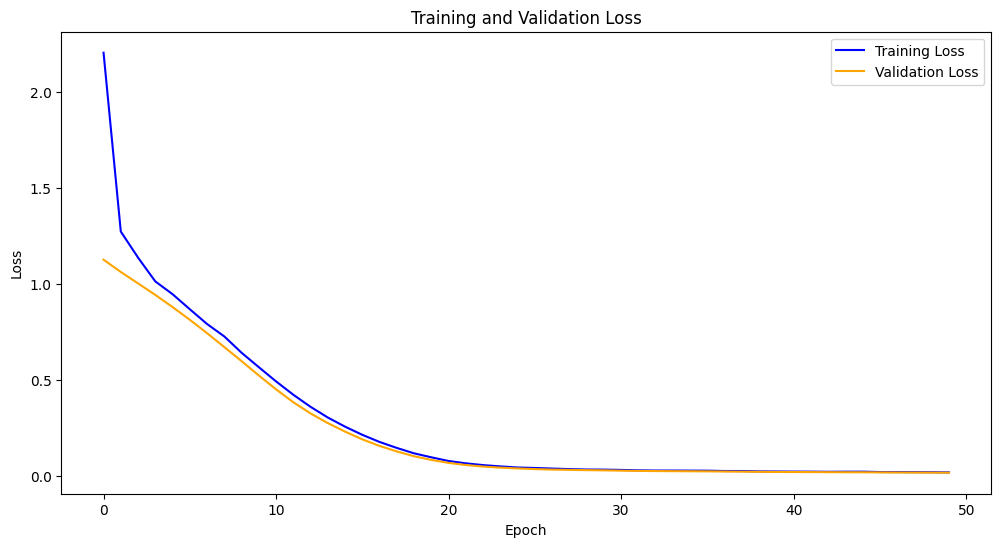

In [ ]:

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history_model2.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_model2.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history_model2.history['loss'], label='Training Loss', color='blue')
plt.plot(history_model2.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [48]:
# Regularization2: L2 Regularization

model3 = Sequential()

# Input layer
model3.add(Dense(128, input_dim=x_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))

# Hidden layers
model3.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model3.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model3.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model3.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))

# Output layer
model3.add(Dense(1, activation='sigmoid'))


# Compile the model without an optimizer
model3.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model3.summary()

# Train the model
history_model3 = model3.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), verbose=1)

# Save the model
model3.save('/content/drive/MyDrive/saved_models/model3.pkl')

# Print the final accuracy
_, train_accuracy = model3.evaluate(x_train, y_train)
test_loss, test_accuracy = model3.evaluate(x_val, y_val)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 128)               2176      
                                                                 
 dense_72 (Dense)            (None, 128)               16512     
                                                                 
 dense_73 (Dense)            (None, 128)               16512     
                                                                 
 dense_74 (Dense)            (None, 128)               16512     
                                                                 
 dense_75 (Dense)            (None, 128)               16512     
                                                                 
 dense_76 (Dense)            (None, 1)                 129       
                                                                 
Total params: 68353 (267.00 KB)
Trainable params: 683

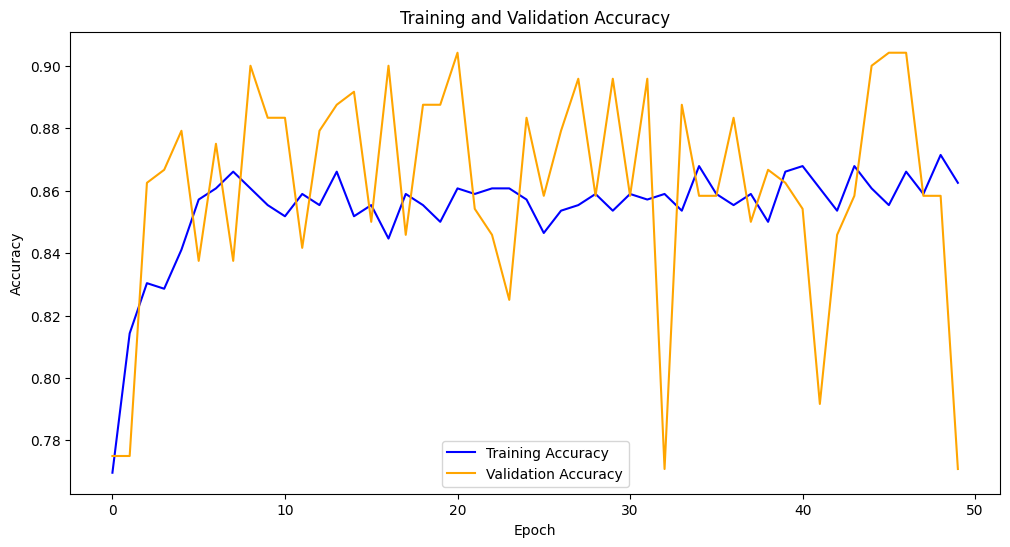

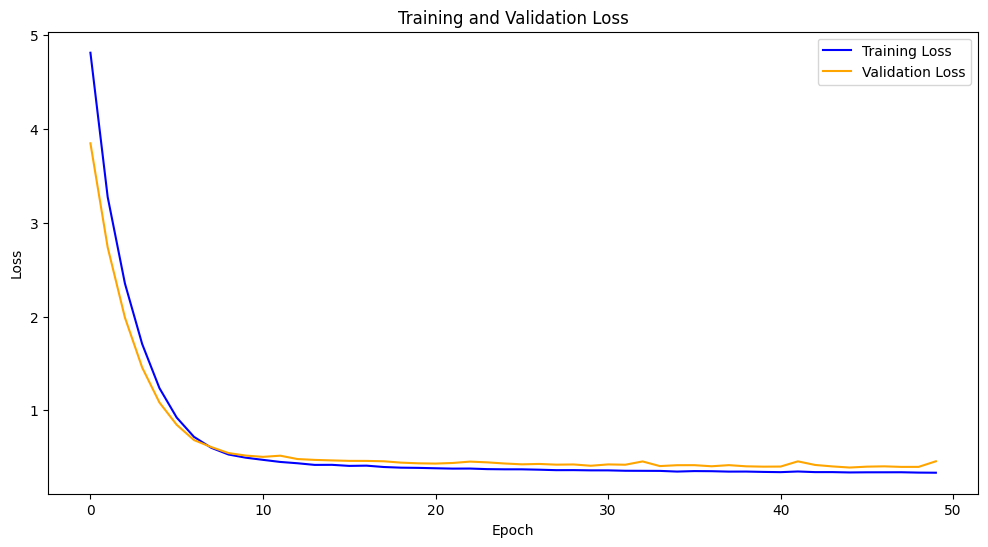

In [47]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history_model3.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_model3.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history_model3.history['loss'], label='Training Loss', color='blue')
plt.plot(history_model3.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Model With Optimization Techniques

## 1. RMSprop

In [134]:
# Define the model architecture
model4=Sequential()
model4.add(Dense(x_train.shape[0],input_dim=x_train.shape[1],activation='relu')) # input layer
model4.add(Dense(128,activation='relu')) # hidden layers
model4.add(Dense(128,activation='relu'))
model4.add(Dense(128,activation='relu'))
model4.add(Dense(128,activation='relu'))
model4.add(Dense(128,activation='relu'))
model4.add(Dense(1,activation='sigmoid')) # sigmoid output

# Compile the model with RMSprop optimizer
model4.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0011),
               loss='binary_crossentropy',
               metrics=['accuracy'])

# Display model summary
model4.summary()

# Train model
history_RMSprop = model4.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), verbose=1)

# Save the model
model4.save('/content/drive/MyDrive/saved_models/model4.pkl')

# Print the final accuracy
_, train_accuracy = model4.evaluate(x_train, y_train)
test_loss, test_accuracy = model4.evaluate(x_val, y_val)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_375 (Dense)           (None, 560)               9520      
                                                                 
 dense_376 (Dense)           (None, 128)               71808     
                                                                 
 dense_377 (Dense)           (None, 128)               16512     
                                                                 
 dense_378 (Dense)           (None, 128)               16512     
                                                                 
 dense_379 (Dense)           (None, 128)               16512     
                                                                 
 dense_380 (Dense)           (None, 128)               16512     
                                                                 
 dense_381 (Dense)           (None, 1)               

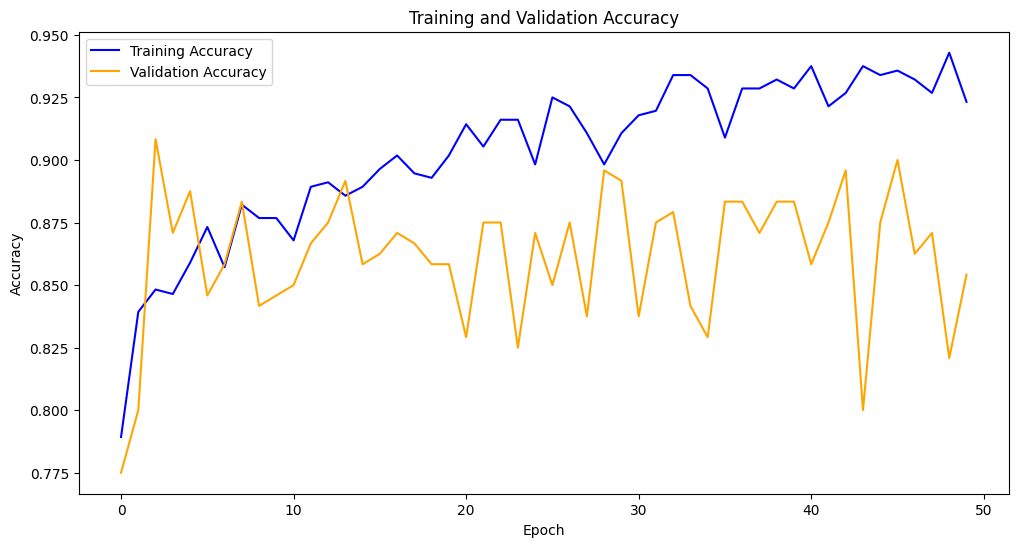

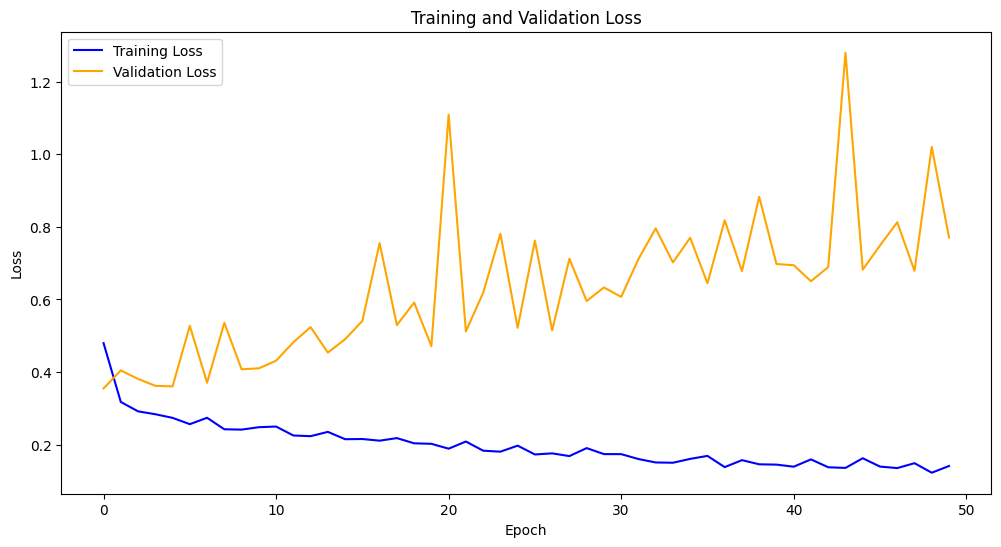

In [94]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history_RMSprop.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_RMSprop.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history_RMSprop.history['loss'], label='Training Loss', color='blue')
plt.plot(history_RMSprop.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 2. Scholastic Gradient Descent

In [148]:
# Define the model architecture
model5=Sequential()
model5.add(Dense(x_train.shape[0],input_dim=x_train.shape[1],activation='relu')) # input layer
model5.add(Dense(128,activation='relu')) # hidden layers
model5.add(Dense(128,activation='relu'))
model5.add(Dense(128,activation='relu'))
model5.add(Dense(128,activation='relu'))
model5.add(Dense(128,activation='relu'))
model5.add(Dense(1,activation='sigmoid')) # sigmoid output

# Compile the model with the SGD optimizer
optimizer = SGD(learning_rate=0.1, momentum=0.9)
model5.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model5.summary()

# Train the model
SGDClassifier = model5.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val), verbose=1)

# Save the model
model5.save('/content/drive/MyDrive/saved_models/model5.pkl')

# Print the final accuracy
_, train_accuracy = model5.evaluate(x_train, y_train)
test_loss, test_accuracy = model5.evaluate(x_val, y_val)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_473 (Dense)           (None, 560)               9520      
                                                                 
 dense_474 (Dense)           (None, 128)               71808     
                                                                 
 dense_475 (Dense)           (None, 128)               16512     
                                                                 
 dense_476 (Dense)           (None, 128)               16512     
                                                                 
 dense_477 (Dense)           (None, 128)               16512     
                                                                 
 dense_478 (Dense)           (None, 128)               16512     
                                                                 
 dense_479 (Dense)           (None, 1)               

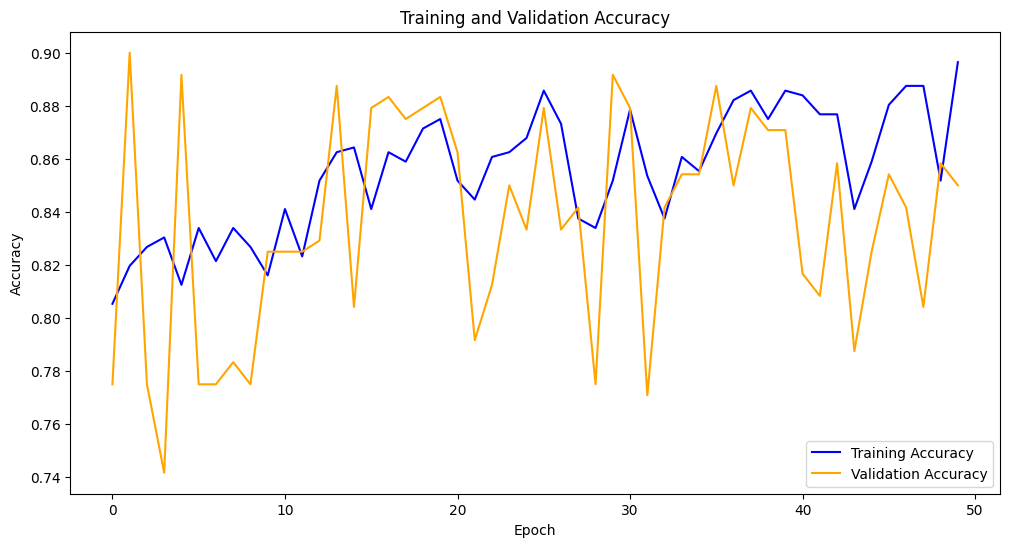

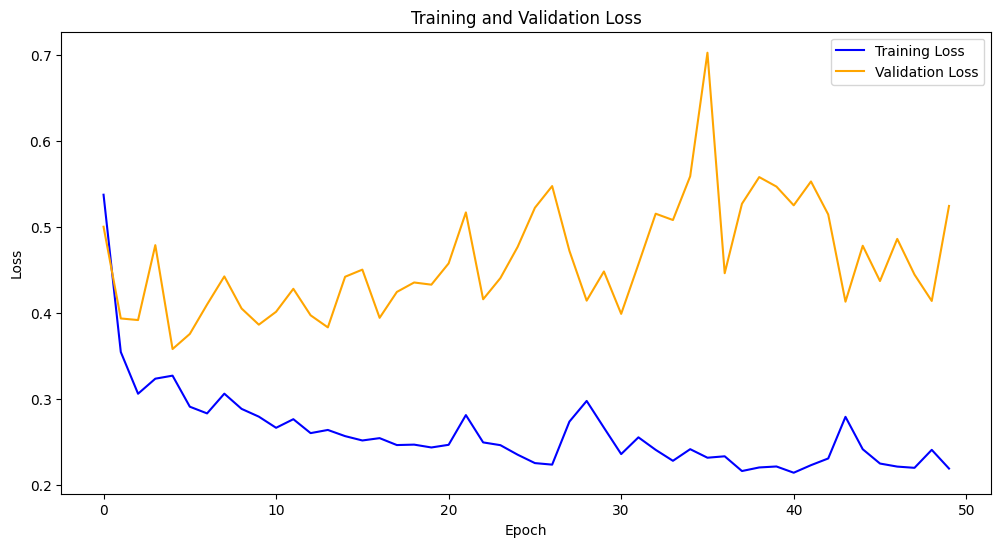

In [149]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(SGDClassifier.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(SGDClassifier.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(SGDClassifier.history['loss'], label='Training Loss', color='blue')
plt.plot(SGDClassifier.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 3. Adam

In [ ]:
# Define the model architecture
model6=Sequential()
model6.add(Dense(x_train.shape[0],input_dim=x_train.shape[1],activation='relu')) # input layer
model6.add(Dense(128,activation='relu')) # hidden layers
model6.add(Dense(128,activation='relu'))
model6.add(Dense(128,activation='relu'))
model6.add(Dense(128,activation='relu'))
model6.add(Dense(128,activation='relu'))
model6.add(Dense(1,activation='sigmoid')) # sigmoid output


# Compile the model with Adam optimizer


model6.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model6.summary()

# Train the model
ADAM = model6.fit(x_train,y_train,epochs=50,validation_data=(x_val,y_val),verbose=1)

# Save the model
model6.save('/content/drive/MyDrive/saved_models/model6.pkl')

# Print the final accuracy
_, train_accuracy = model6.evaluate(x_train, y_train)
test_loss, test_accuracy = model6.evaluate(x_val, y_val)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


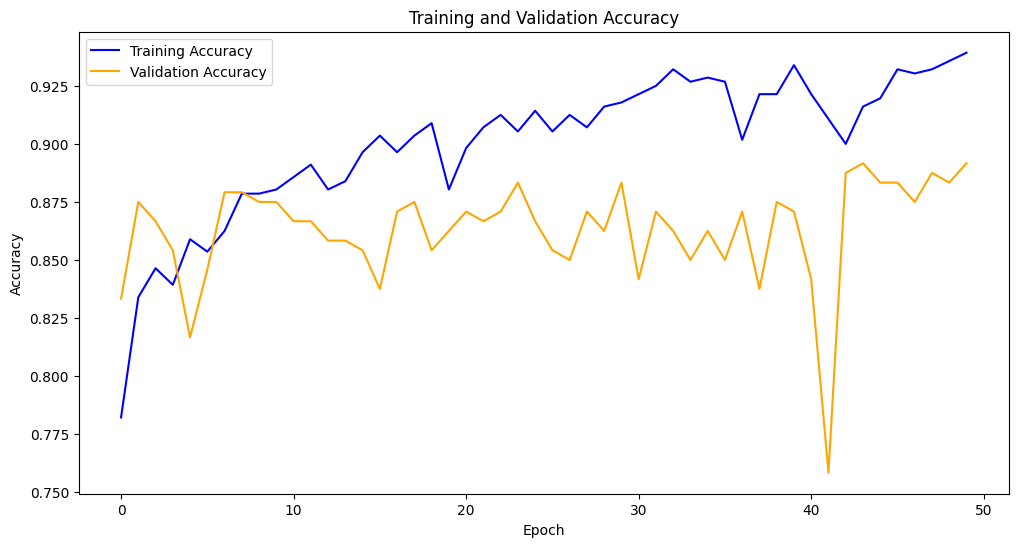

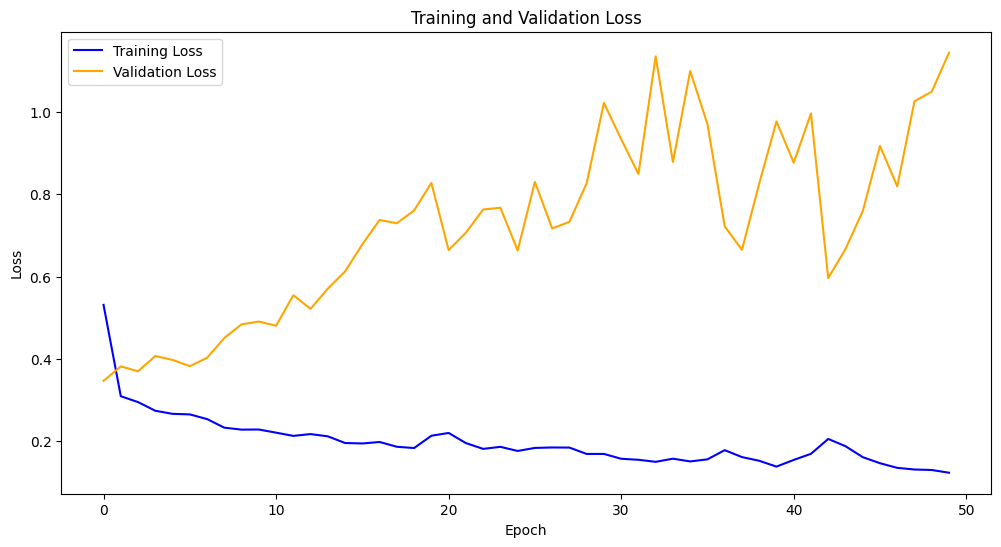

In [61]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(ADAM.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(ADAM.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(ADAM.history['loss'], label='Training Loss', color='blue')
plt.plot(ADAM.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Error Analysis

In [153]:
def error_analysis(model, x_val, y_val):
    from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

    # Predictions on test set
    y_pred = model.predict(x_val)
    y_pred_binary = (y_pred > 0.5).astype('int32')

    # Confusion matrix
    cm = confusion_matrix(y_val, y_pred_binary)

    # Accuracy
    accuracy = accuracy_score(y_val, y_pred_binary)

    # Precision
    precision = precision_score(y_val, y_pred_binary, zero_division=0)

    # Recall
    recall = recall_score(y_val, y_pred_binary, zero_division=0)

    # F1 Score
    f1 = f1_score(y_val, y_pred_binary, zero_division=0)

    # Print error analysis
    print("Confusion Matrix:")
    print(cm)
    print("\nAccuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)


### 1. Without Optimization

In [154]:
# Error analysis for model without optimization
model = model1
results_without_opt = error_analysis(model, x_val, y_val)
print(results_without_opt)

8/8 [==============================] - 0s 4ms/step
Confusion Matrix:
[[173  13]
 [ 16  38]]

Accuracy: 0.8791666666666667
Precision: 0.7450980392156863
Recall: 0.7037037037037037
F1 Score: 0.7238095238095239
None


In [113]:
# Error analysis for model with regularization L1
model = model2
results_without_opt_RL1 = error_analysis(model, x_val, y_val)
print(results_without_opt_RL1)

8/8 [==============================] - 0s 2ms/step
Confusion Matrix:
[[186   0]
 [ 54   0]]

Accuracy: 0.775
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
None


In [114]:
# Error analysis for model with regularization L2
model = model3
results_without_opt_RL2 = error_analysis(model, x_val, y_val)
print(results_without_opt_RL2)

8/8 [==============================] - 0s 3ms/step
Confusion Matrix:
[[181   5]
 [ 18  36]]

Accuracy: 0.9041666666666667
Precision: 0.8780487804878049
Recall: 0.6666666666666666
F1 Score: 0.7578947368421053
None


### 2. RMSprop

In [116]:
# Error analysis for RMSprop model
model = model4
results_with_rmsprop = error_analysis(model, x_val, y_val)
print(results_with_rmsprop)

8/8 [==============================] - 0s 4ms/step
Confusion Matrix:
[[172  14]
 [ 14  40]]

Accuracy: 0.8833333333333333
Precision: 0.7407407407407407
Recall: 0.7407407407407407
F1 Score: 0.7407407407407407
None


## 3. Scholastic Gradient Descent

In [155]:
# Error analysis for SGD model
model = model5
results_with_sgd = error_analysis(model, x_val, y_val)
print(results_with_sgd)

8/8 [==============================] - 0s 2ms/step
Confusion Matrix:
[[161  25]
 [ 11  43]]

Accuracy: 0.85
Precision: 0.6323529411764706
Recall: 0.7962962962962963
F1 Score: 0.7049180327868853
None


### 4. Adam

In [156]:
# Error analysis for ADAM model
model = model6
results_with_adam = error_analysis(model, x_val, y_val)
print(results_with_adam)

8/8 [==============================] - 0s 3ms/step
Confusion Matrix:
[[  0 186]
 [  0  54]]

Accuracy: 0.225
Precision: 0.225
Recall: 1.0
F1 Score: 0.36734693877551017
None
